In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils_plot import extract_data_from_dfgen
from utils_plot import trajInspection
from utils_plot import tsne_anslysis

In [3]:
from utils_evaluation import create_df_for_cdf, sns_comparison
from utils_evaluation import create_df_for_lineplot, sns_ks
from utils_evaluation import weighted_ks_2samp

# Load Data

In [5]:
# Replace 'your_file.csv' with the actual path to your CSV file
path_raw = 'Synthetic_crash_scenarios.csv'
# path_raw = '/content/drive/MyDrive/Colab Notebooks/Thesis Crash Generation/New dataset/Synthetic_crash_scenarios.csv'
# path_gen = 'Synthetic_Crash_50.csv'
# path_gen = 'Synthetic_Crash_dtw_50_postprocessed.csv'
# path_gen = 'Synthetic_Crash_dtw_02_postprocessed.csv'
path_gen = "Synthetic_Crash_dtw_02_80_postprocessed.csv"

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(path_raw)
df_gen = pd.read_csv(path_gen)

In [6]:
## read the ID of train, val, test dataset
import pickle
# # with open('.\\utils_data\\Idx_fd_50_split.pkl', 'rb') as f:
# with open('.\\utils_data\\Idx_fd_02_split.pkl', 'rb') as f:
#     list_train_val_test = pickle.load(f)
# list_train_val_test = list_train_val_test[0]

# ID_train, ID_val, ID_test = list_train_val_test[0], list_train_val_test[1], list_train_val_test[2]
# ID_train, ID_val, ID_test = ID_train+1, ID_val+1, ID_test+1

with open(".\\utils_data\\Idx_fddtw_02_80_split.pkl", 'rb') as f:
    Idx_and_y = pickle.load(f)

idx_train, idx_val, idx_test = Idx_and_y[0][0], Idx_and_y[0][1], Idx_and_y[0][2]
idx_trainval = Idx_and_y[1][0]
y_trainval = Idx_and_y[2][0]

ID_train, ID_val, ID_test = np.copy(idx_train+1), np.copy(idx_val+1), np.copy(idx_test+1)
ID_trainval = np.copy(idx_trainval+1)

y_train = y_trainval[np.array([list(ID_trainval).index(ID) for ID in ID_train])]
y_val = y_trainval[np.array([list(ID_trainval).index(ID) for ID in ID_val])]

In [7]:
# ID_eva_raw = np.copy(ID_train)
# ID_eva_raw = np.copy(ID_val)
# ID_eva_raw = np.copy(ID_test)
ID_eva_raw = np.copy(ID_trainval)

# V_l = np.zeros((5000,97))
# V_f = np.zeros((5000,97))
# D = np.zeros((5000,97))
# Weight = np.zeros(5000)
V_l = np.zeros((ID_eva_raw.shape[0],97))
V_f = np.zeros((ID_eva_raw.shape[0],97))
D = np.zeros((ID_eva_raw.shape[0],97))
Weight = np.zeros(ID_eva_raw.shape[0])
# for i in range(1,5001):
for i, ID in enumerate(ID_eva_raw):
    v_l_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 3].to_numpy()
    v_f_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 2].to_numpy()
    d_i = df_raw[df_raw["id"]==ID].iloc[-98:-1, 4].to_numpy() - df_raw[df_raw["id"]==ID].iloc[-2, 4]
    weight_i = df_raw[df_raw["id"]==ID].iloc[0, 6]
    V_l[i,:], V_f[i,:], D[i,:] = v_l_i, v_f_i, d_i
    Weight[i] = weight_i

import copy
V_l_raw = copy.deepcopy(V_l)
V_f_raw = copy.deepcopy(V_f)
D_raw = copy.deepcopy(D)
Weight_raw = copy.deepcopy(Weight)

# Trajectories Visualization

In [9]:
from utils_cluster import genNormalizedX

# ID_eva = copy.deepcopy(ID_test)
# ID_eva = copy.deepcopy(ID_train)
# ID_eva = np.arange(1,5001)
ID_eva = np.copy(ID_eva_raw)

split_type = 'test'
V_l_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_l',split_type = split_type)
V_f_gen_eva = extract_data_from_dfgen(df_gen,para = 'v_f',split_type = split_type)
D_gen_eva = extract_data_from_dfgen(df_gen,para = 'd',split_type = split_type)
Weight_gen_eva = extract_data_from_dfgen(df_gen,para = 'weight',split_type = split_type)
ReWeight_gen_eva = extract_data_from_dfgen(df_gen,para = 'reweight',split_type = split_type)
y_gen_eva = extract_data_from_dfgen(df_gen,para = 'label',split_type = split_type)
idxcut_gen_eva = extract_data_from_dfgen(df_gen,para = 'qualify',split_type = split_type)

# X_raw_eva = genNormalizedX(V_l_raw[ID_eva-1],V_f_raw[ID_eva-1],D_raw[ID_eva-1])
X_raw_eva = genNormalizedX(V_l_raw,V_f_raw,D_raw)
X_gen_eva = genNormalizedX(V_l_gen_eva,V_f_gen_eva,D_gen_eva)

# X_gen_eva = X_gen_eva[:int(X_gen_eva.shape[0]/15*3)]
# Weight_gen_eva = Weight_gen_eva[:int(Weight_gen_eva.shape[0]/15*3)]

In [10]:
# # y_gen_eva = np.load(".\\utils_data\\hc_fddtw_y_50.npy")
# # y_gen_eva_filter = y_gen_eva[1]
# # y_gen_eva = y_gen_eva[0]
# y_raw = np.load('.\\utils_data\\hc_fd_y.npy')
# y_raw_eva = y_raw[ID_eva-1]

# y_raw_eva = np.copy(y_train)
# y_raw_eva = np.copy(y_test)
y_raw_eva = np.copy(y_trainval)

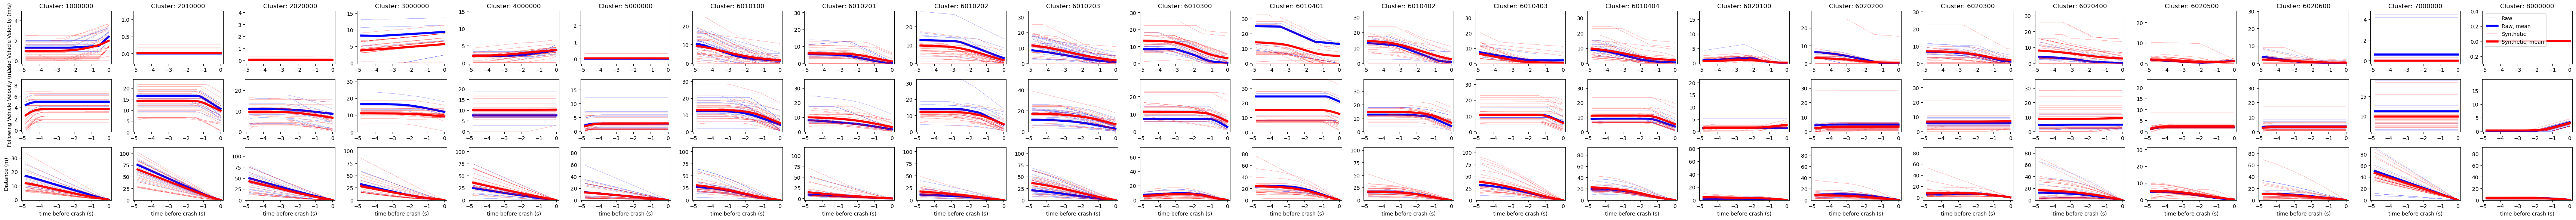

In [19]:
trajInspection(
    X_raw_eva,X_gen_eva,
    y_raw_eva,y_gen_eva,
    # Weight_raw[ID_eva-1],Weight_gen_eva,
    Weight_raw,Weight_gen_eva,
    traj_number = 25,
    line_transparency = 1,
)

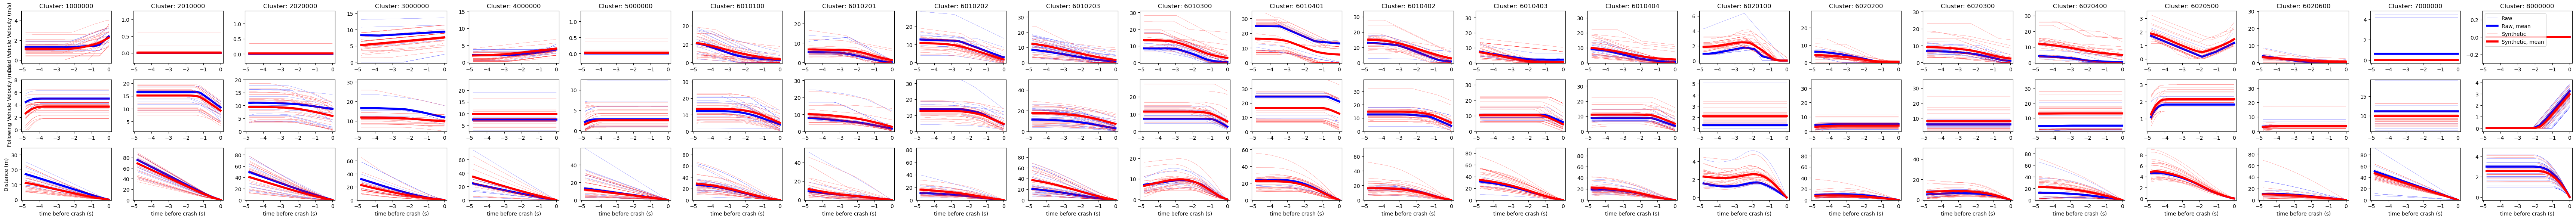

In [20]:
trajInspection(
    X_raw_eva,X_gen_eva[idxcut_gen_eva],
    y_raw_eva,y_gen_eva[idxcut_gen_eva],
    # Weight_raw[ID_eva-1],ReWeight_gen_eva[idxcut_gen_eva],
    Weight_raw,ReWeight_gen_eva[idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

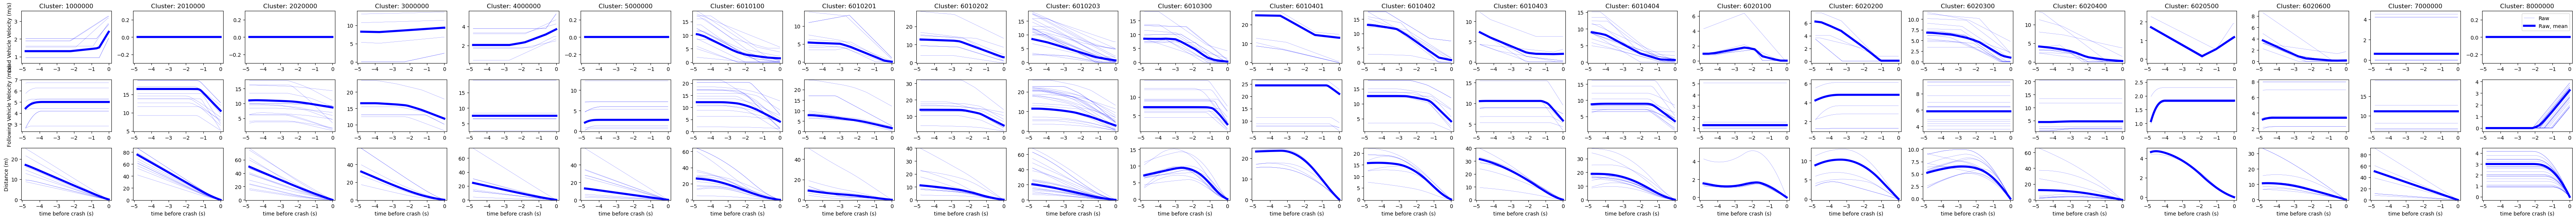

In [21]:
from utils_plot import clsInspection
clsInspection(
    X_raw_eva,
    y_raw_eva,
    Weight_raw,
    traj_number = 25,
    line_transparency = 1,
)

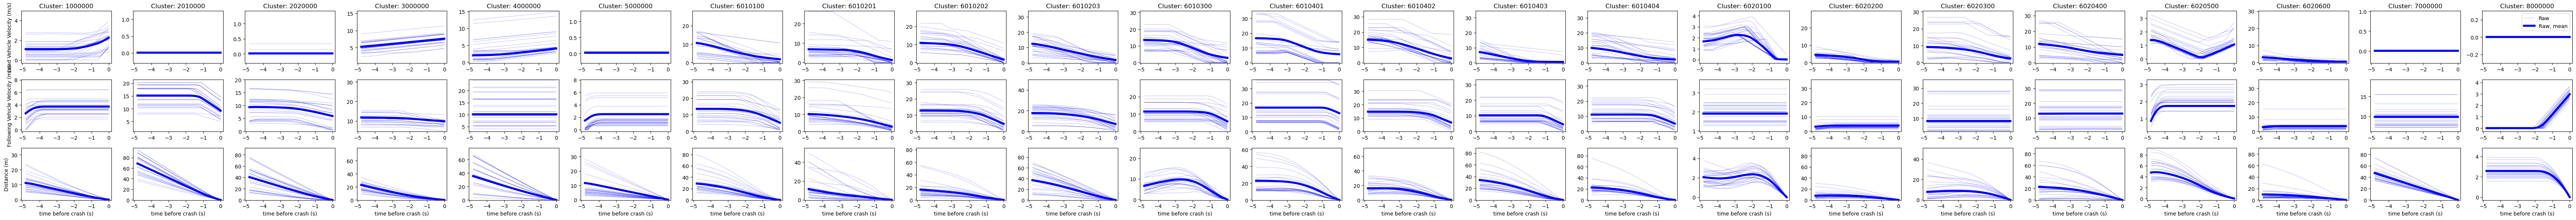

In [22]:
from utils_plot import clsInspection
clsInspection(
    X_gen_eva[idxcut_gen_eva],
    y_gen_eva[idxcut_gen_eva],
    Weight_gen_eva[idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

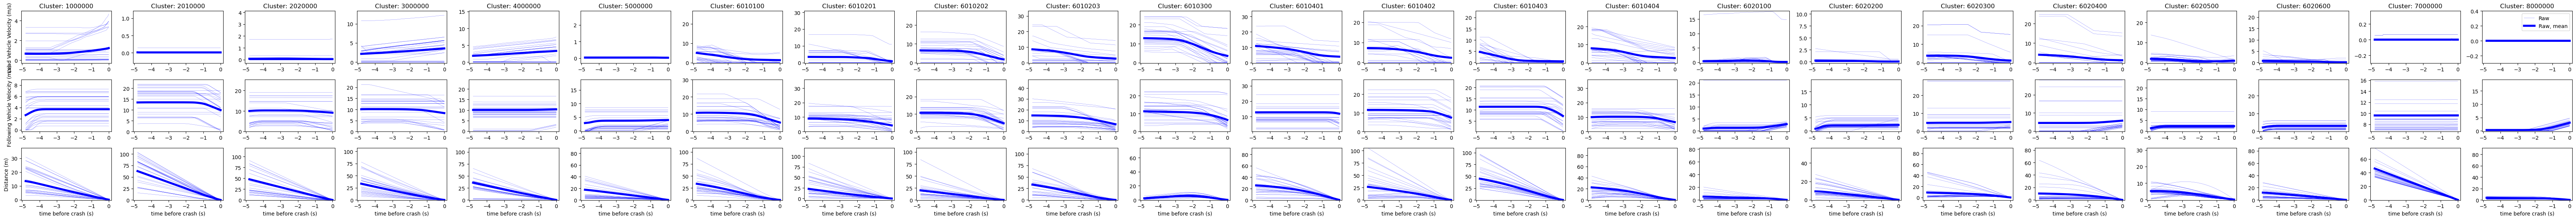

In [23]:
from utils_plot import clsInspection
clsInspection(
    X_gen_eva[~idxcut_gen_eva],
    y_gen_eva[~idxcut_gen_eva],
    Weight_gen_eva[~idxcut_gen_eva],
    traj_number = 25,
    line_transparency = 1,
)

In [15]:
# [:y_gen_eva.shape[0]][y_gen_eva_filter!=-1]

# T-SNE plot

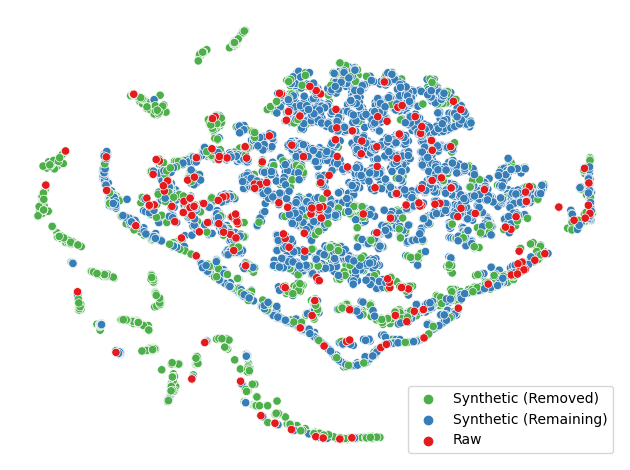

y     comp-1     comp-2  weights
0       Synthetic (Removed) -73.200363   9.026140        1
1     Synthetic (Remaining) -36.796711   1.003968        1
2     Synthetic (Remaining)  74.797432  13.410002        1
3       Synthetic (Removed) -71.723915   9.615801        1
4       Synthetic (Removed) -58.288525  -7.976893        1
...                     ...        ...        ...      ...
8192                    Raw  -3.181407  54.937984        1
8193                    Raw   6.057091  45.429993        1
8194                    Raw -22.721771  12.757545        1
8195                    Raw  -2.470816   4.566878        1
8196                    Raw  -6.724414  42.677494        1

[8197 rows x 4 columns]

In [21]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9])

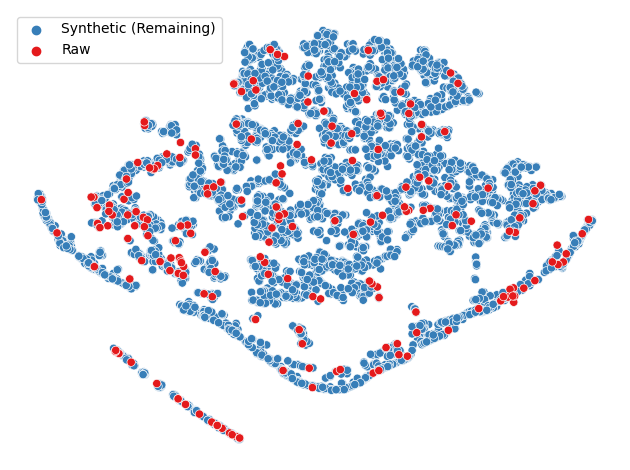

y     comp-1     comp-2  weights
0     Synthetic (Remaining) -51.681515 -13.797371        1
1     Synthetic (Remaining)  69.221878   9.803534        1
2     Synthetic (Remaining) -40.673462 -18.863125        1
3     Synthetic (Remaining) -76.183182  -9.505369        1
4     Synthetic (Remaining)  -4.461964 -41.758686        1
...                     ...        ...        ...      ...
5404                    Raw -14.483391  55.915035        1
5405                    Raw  -2.727920  46.935703        1
5406                    Raw -33.809410   6.885701        1
5407                    Raw -12.599126   2.446078        1
5408                    Raw -18.899113  42.206985        1

[5409 rows x 4 columns]

In [22]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9],show_removed = False)

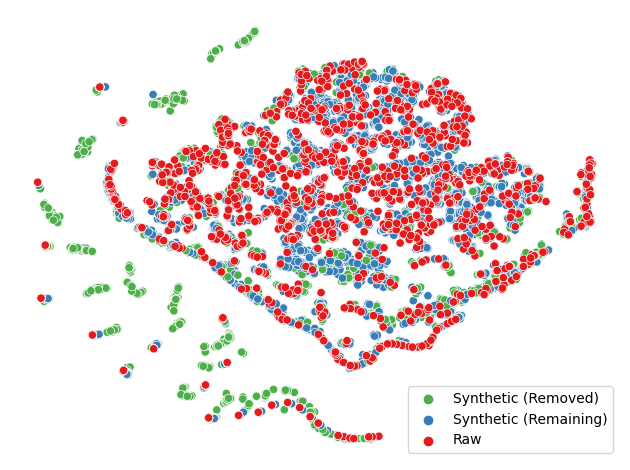

y     comp-1     comp-2  weights
0       Synthetic (Removed) -77.341026   2.857951        1
1     Synthetic (Remaining) -42.038002  -4.395719        1
2     Synthetic (Remaining)  77.649979  15.243691        1
3       Synthetic (Removed) -78.535004   1.774527        1
4       Synthetic (Removed) -57.293064 -12.503543        1
...                     ...        ...        ...      ...
9586                    Raw  36.266144  13.157732        1
9587                    Raw -15.487820  21.628859        1
9588                    Raw  42.001179  -3.110913        1
9589                    Raw  46.409958  18.403643        1
9590                    Raw -33.587200   8.733319        1

[9591 rows x 4 columns]

In [15]:
tsne_anslysis(X_raw_eva[::3,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9])

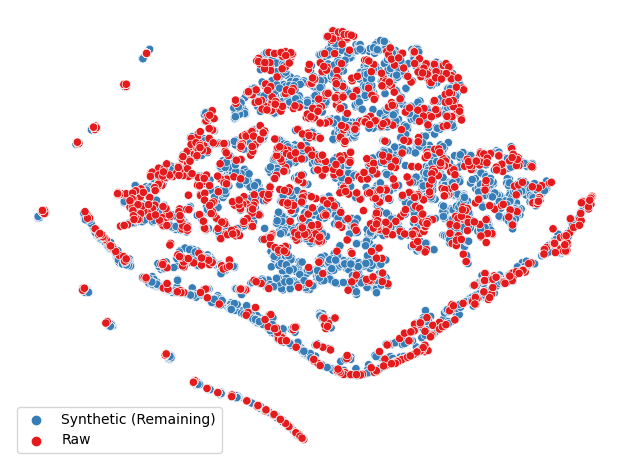

y     comp-1     comp-2  weights
0     Synthetic (Remaining) -49.308544 -17.508841        1
1     Synthetic (Remaining)  77.371826   4.015337        1
2     Synthetic (Remaining) -34.951946 -21.359226        1
3     Synthetic (Remaining) -71.498070 -19.593836        1
4     Synthetic (Remaining)  -0.842275 -43.461590        1
...                     ...        ...        ...      ...
6798                    Raw  29.302341  11.924547        1
6799                    Raw -30.975033  23.673071        1
6800                    Raw  36.507732  -5.998848        1
6801                    Raw  41.488541  17.353577        1
6802                    Raw -42.355633   1.017791        1

[6803 rows x 4 columns]

In [16]:
tsne_anslysis(X_raw_eva[::3,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9],show_removed = False)

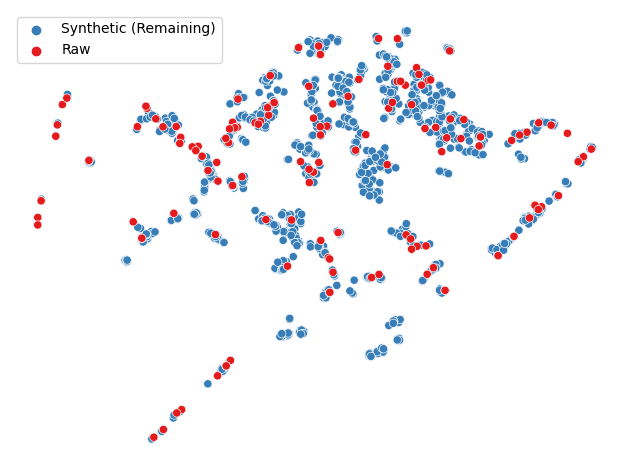

y     comp-1     comp-2  weights
0     Synthetic (Remaining) -20.111658  -1.224732        1
1     Synthetic (Remaining) -18.030821   0.749323        1
2     Synthetic (Remaining)  28.854433 -23.701181        1
3     Synthetic (Remaining)  -8.799949 -33.535358        1
4     Synthetic (Remaining)   1.689102 -25.265535        1
...                     ...        ...        ...      ...
1518                    Raw -23.956673 -42.547337        1
1519                    Raw -66.382729  -9.338163        1
1520                    Raw -59.509258  18.581137        1
1521                    Raw -33.594597 -50.725368        1
1522                    Raw -65.583755  -4.025511        1

[1523 rows x 4 columns]

In [12]:
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[:,:,0],idxcut_gen_eva,show_removed = False)

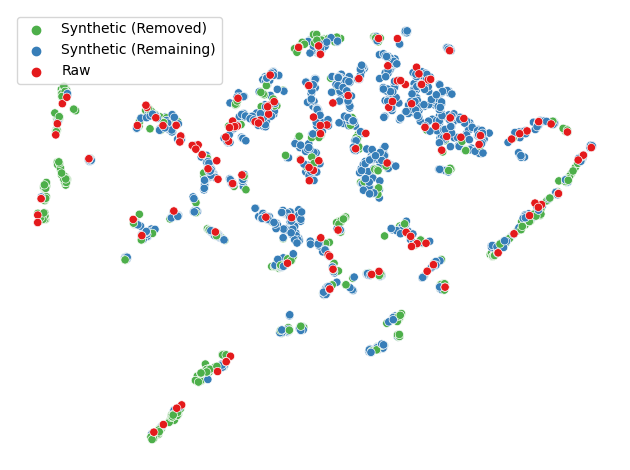

y     comp-1     comp-2  weights
0       Synthetic (Removed) -39.594395 -11.459779        1
1       Synthetic (Removed)  58.468449  11.276109        1
2     Synthetic (Remaining) -20.111658  -1.224732        1
3     Synthetic (Remaining) -18.030821   0.749323        1
4       Synthetic (Removed) -42.025112  13.975953        1
...                     ...        ...        ...      ...
2155                    Raw -23.956673 -42.547337        1
2156                    Raw -66.382729  -9.338163        1
2157                    Raw -59.509258  18.581137        1
2158                    Raw -33.594597 -50.725368        1
2159                    Raw -65.583755  -4.025511        1

[2160 rows x 4 columns]

In [13]:
# tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[::9,:,0],idxcut_gen_eva[::9])
tsne_anslysis(X_raw_eva[:,:,0],X_gen_eva[:,:,0],idxcut_gen_eva)

# Distribution Evaluation

In [62]:
import seaborn as sns
def weighted_percentile(data, weights, percentiles):
    """Calculate the weighted percentiles of a given data with corresponding weights."""
    # Sort data and weights by the data
    sorted_indices = np.argsort(data)
    sorted_data = np.array(data)[sorted_indices]
    sorted_weights = np.array(weights)[sorted_indices]

    # Calculate the cumulative sum of weights and normalize it to [0, 1] range
    cumulative_weights = np.cumsum(sorted_weights)
    cumulative_weights = cumulative_weights/cumulative_weights[-1]

    # Interpolate the percentiles based on cumulative weights
    return np.interp(percentiles, cumulative_weights, sorted_data)
def format_interval(interval):
    if interval.left <= 0:  # If the lower bound is negative or zero
        return '{0}'
    elif interval.left == 1e-05:
        return f"({0},{interval.right}]"
    else:
        return f"({interval.left},{interval.right}]"

In [110]:
df_gen[::101*15]

id  idx    t        v_f      v_l          d  lead_delta_v  \
0           1    1 -5.0   0.000000   0.0250   4.495375      0.809665   
1515       16    1 -5.0   6.262500   0.1795  30.127813      3.300478   
3030       31    1 -5.0   0.000000   0.0375   6.805563      1.162173   
4545       46    1 -5.0   5.017773   3.6235   6.569717      0.131741   
6060       61    1 -5.0  17.370000  11.6575  53.407000      6.170003   
...       ...  ...  ...        ...      ...        ...           ...   
7567425  4926   15 -5.0  14.413147  16.4225  25.514025      4.618335   
7568940  4941   15 -5.0   8.734899   3.2075  18.836782      0.698143   
7570455  4956   15 -5.0  12.092213  11.9045  13.999377      1.019872   
7571970  4971   15 -5.0  16.634858  20.6695   6.120075      1.347481   
7573485  4986   15 -5.0   8.499868   6.9500  10.937976      2.836085   

           weight  valid split_type    label  qualify  reweight  
0        0.012977   True       test  5000000    False  0.000000  
1515     0.029018   True       test  1000000     True  0.025036  
3030     2.233928   True      train  6020200    False  0.000000  
4545     0.688279   True       test  4000000     True  1.001505  
6060     0.016393   True       test  6020400     True  0.037931  
...           ...    ...        ...      ...      ...       ...  
7567425  0.362410   True       test  6010404     True  0.429895  
7568940  3.874265   True       test  3000000     True  1.104899  
7570455  0.727926   True       test  6010402     True  0.248702  
7571970  1.614278   True       test  6010300     True  3.469465  
7573485  0.447154   True       test  6010201     True  2.565391  

[5000 rows x 13 columns]

In [204]:
Para_gen_eva[~np.any(Para_gen_eva<0,axis=1),:].shape

(71921, 97)

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


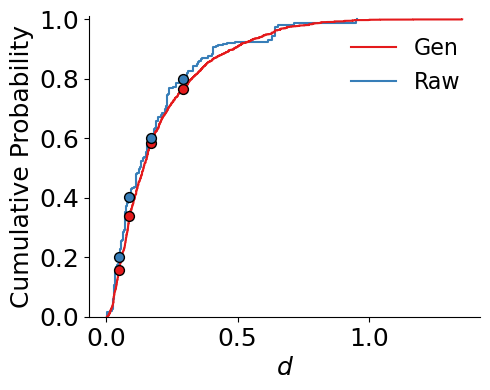

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


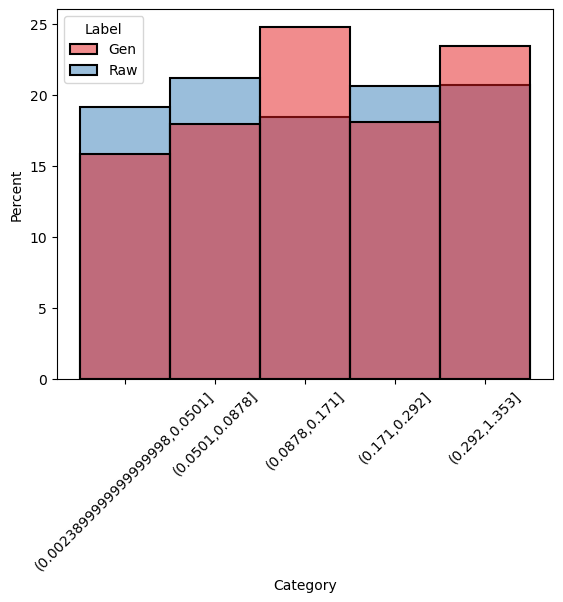

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\2735284628.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


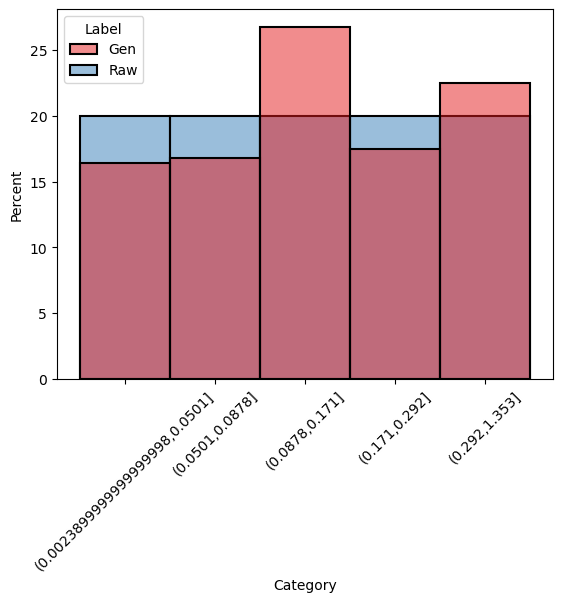

p_value on t = 0s is 1.0


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


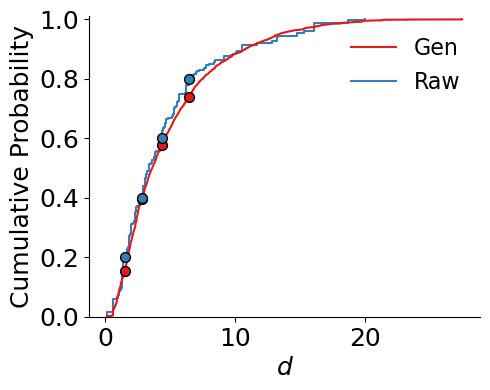

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


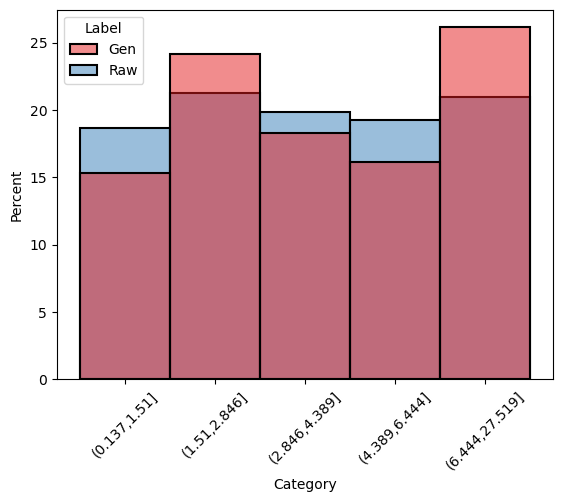

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\2735284628.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


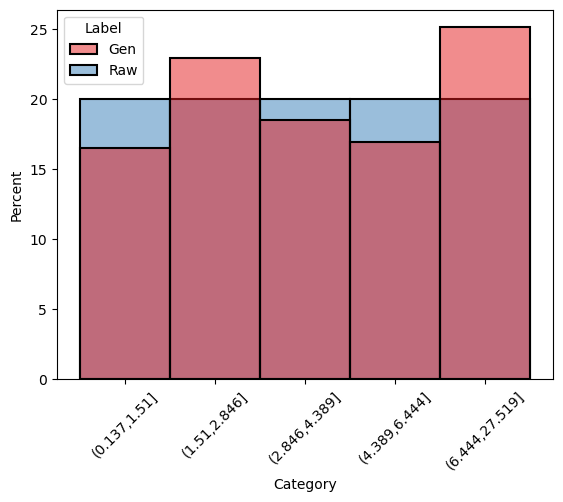

p_value on t = 1s is 0.919294954640453


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


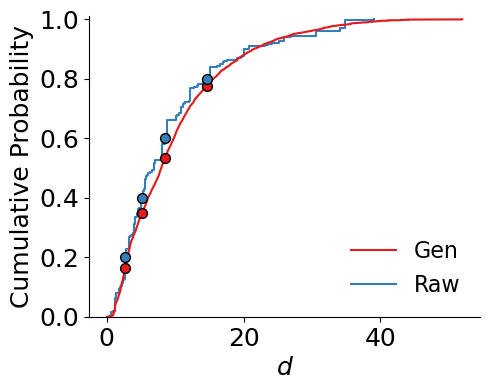

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


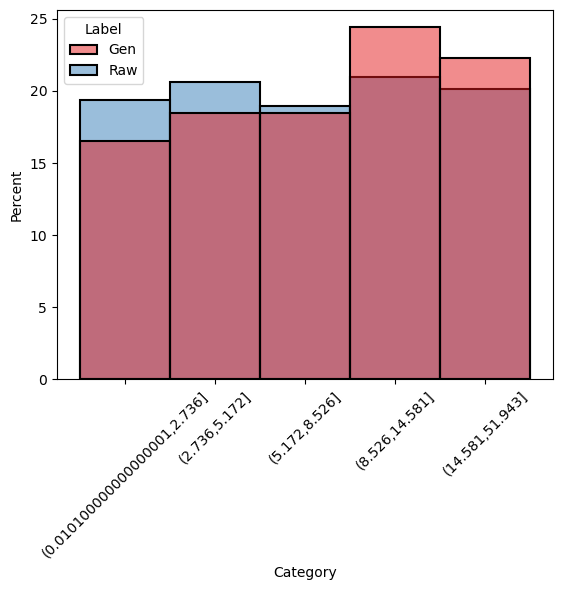

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\2735284628.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


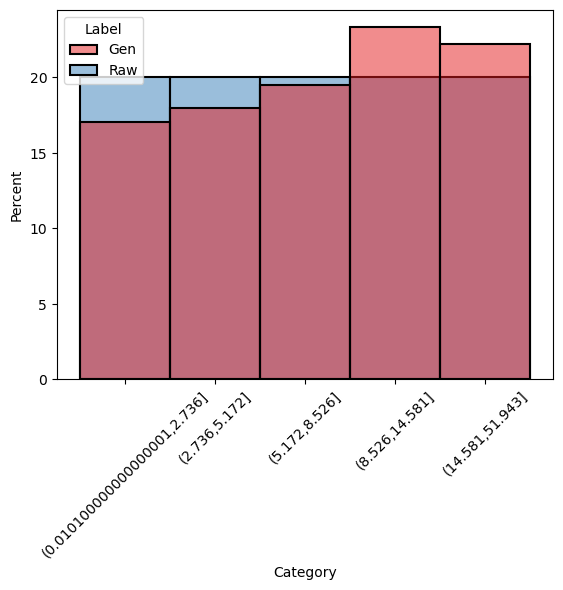

p_value on t = 2s is 0.4823361736033669


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


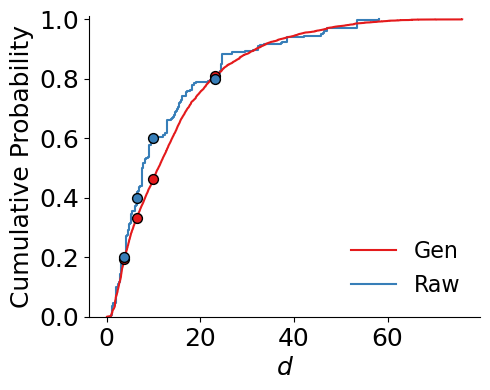

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


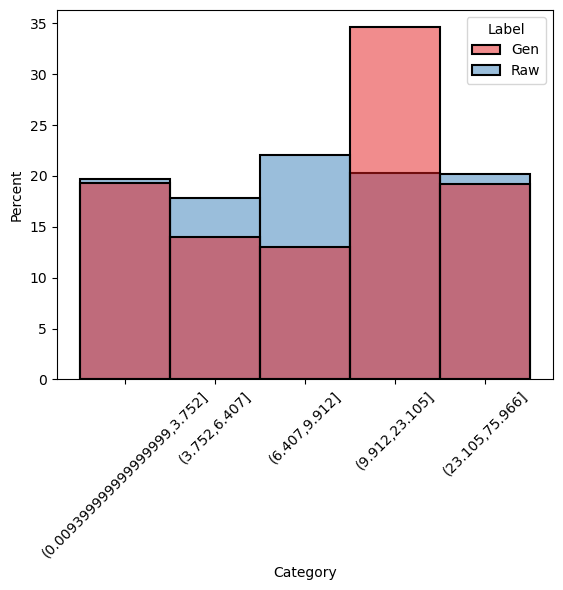

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\2735284628.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


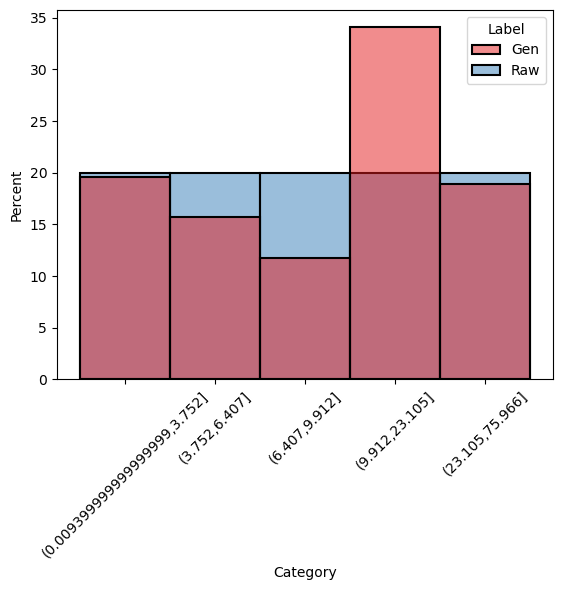

p_value on t = 3s is 0.1621245418157583


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


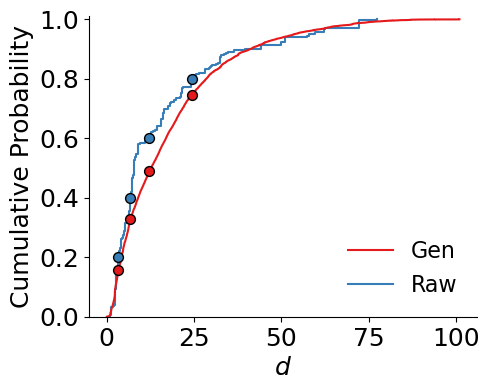

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


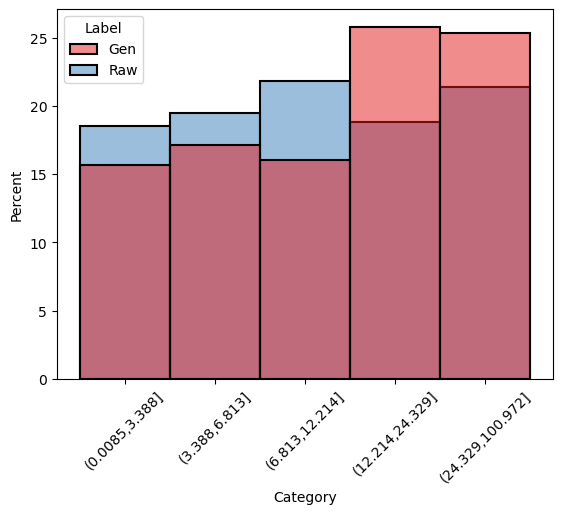

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\2735284628.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


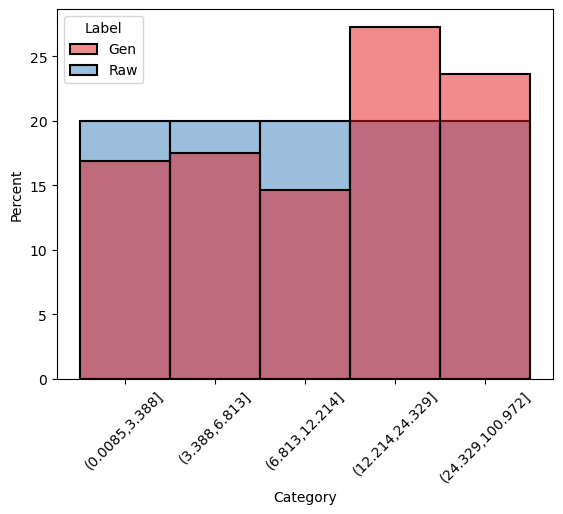

p_value on t = 4s is 0.0345102390422235


In [226]:
import copy
para = "d"
# ID_eva = copy.deepcopy(ID_test)
# ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type=split_type)
if para == "d":
    Weight_gen_eva = Weight_gen_eva[~np.any(Para_gen_eva<0,axis=1)]
    Para_gen_eva = Para_gen_eva[~np.any(Para_gen_eva<0,axis=1),:]

if para == "v_l":
    # Para_raw_eva = V_l_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_l_raw)
elif para == "v_f":
    # Para_raw_eva = V_f_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_f_raw)
elif para == "d":
    # Para_raw_eva = D_raw[ID_eva-1]
    Para_raw_eva = np.copy(D_raw)
# Weight_raw_eva = Weight_raw[ID_eva-1]
Weight_raw_eva = np.copy(Weight_raw)

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t-1],Para_raw_eva[:,-1-20*t-1]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )
    # Separate the zero and non-zero data
    n_bins = 5
    df_plot_raw_nonzero = df_plot[np.all([df_plot['Label'] == "Raw",df_plot['Data'] > 0],axis=0)]  # Data greater than zero
    bins = weighted_percentile(df_plot_raw_nonzero['Data'], df_plot_raw_nonzero['Weight'], np.linspace(0, 1, n_bins+1))
    # bins = np.concatenate(( [0,1e-5], bins[1:-1], [np.max(df_plot['Data'])] ))
    if np.max(df_plot['Data'])!= bins[-1]:
        bins = np.concatenate(( bins[:-1], [np.max(df_plot['Data'])] ))
    if np.min(df_plot['Data'])==0:
        bins = np.concatenate(( [0,1e-5], bins[1:] ))
    elif np.min(df_plot['Data'])!= bins[0]:
        bins = np.concatenate(( [np.min(df_plot['Data'])], bins[1:] ))
    df_plot['Category'] = pd.cut(df_plot['Data'], bins=bins, include_lowest=True)
    df_plot['Category'] = df_plot['Category'].apply(format_interval)

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        x_percentile_points = bins[1:-1],
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()

    sns.histplot(
        data=df_plot,
        x="Category",
        weights = "Weight",
        stat='percent',
        hue = "Label",
        common_bins=True,
        common_norm=False,
        palette='Set1',
        linewidth=1.5
    )
    plt.xticks(rotation=45)
    plt.show()

    # Calculate the current weights for 'Raw'
    raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()    
    # Calculate coefficients for each category
    coefficients = np.sum(raw_weights)/n_bins/raw_weights
    # Apply the coefficients to both 'Raw' and 'Gen' weights
    df_plot['Adjusted_Weight'] = df_plot.apply(
        # lambda row: row['Weight'] * coefficients[row['Category']] if row['Label'] == 'Raw' else row['Weight'] * coefficients[row['Category']],
        lambda row: row['Weight'] * coefficients[row['Category']],
        axis=1
    )    
    # Now, 'Adjusted_Weight' contains the new weights
    sns.histplot(
        data=df_plot,
        x="Category",
        weights="Adjusted_Weight",
        stat='percent',
        hue="Label",
        common_bins=True,
        common_norm=False,
        palette='Set1',
        linewidth=1.5
    )
    plt.xticks(rotation=45)
    plt.show()
    
    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

[0.00374521 0.050117   0.08775    0.17093595 0.29187073 0.9535    ]
0.0033891222


C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


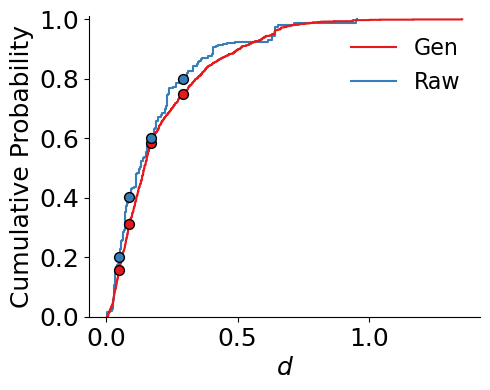

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


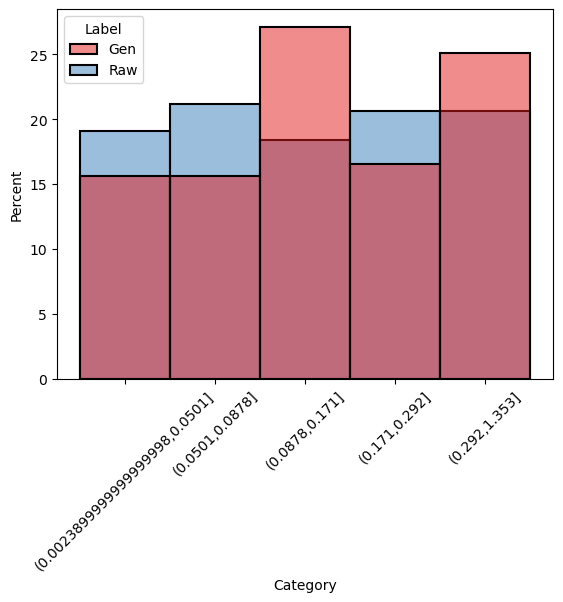

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\149695928.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


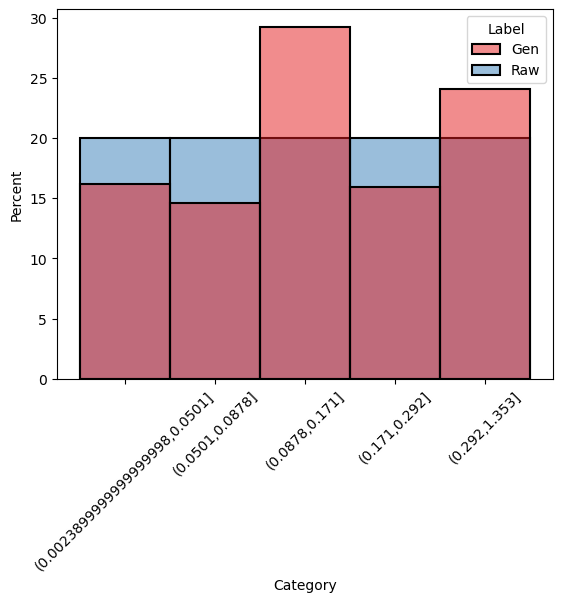

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 0s is 1.0
[ 0.18889945  1.51006936  2.84578455  4.38915851  6.44426948 20.0235    ]
0.1377233234500006


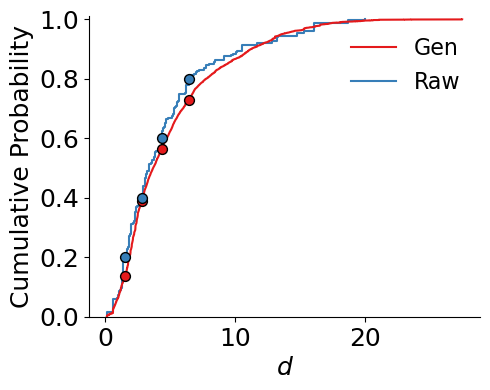

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


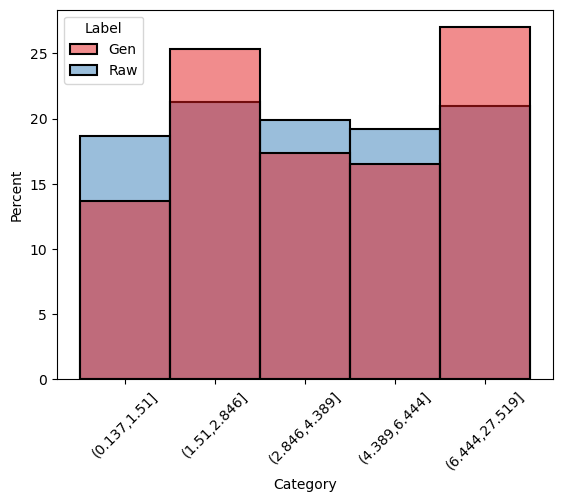

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\149695928.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


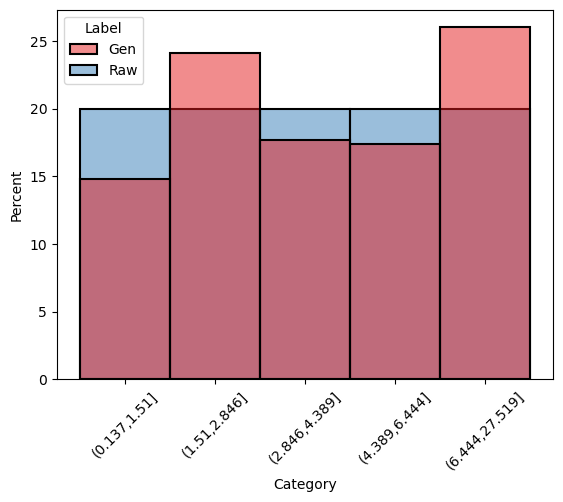

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 1s is 0.734684773480764
[ 0.58405368  2.73637485  5.17198997  8.52623221 14.58078595 39.0935    ]
0.0111137656500126


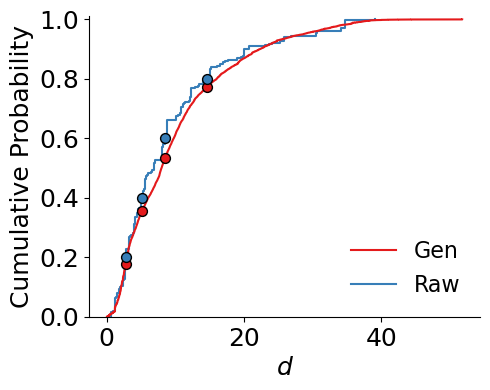

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


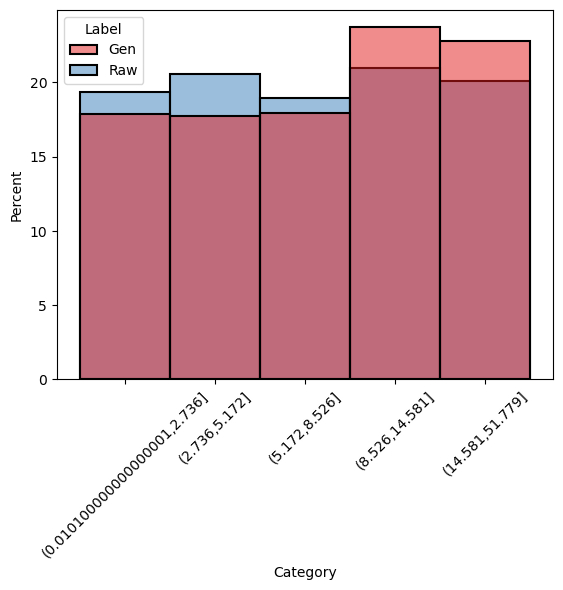

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\149695928.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


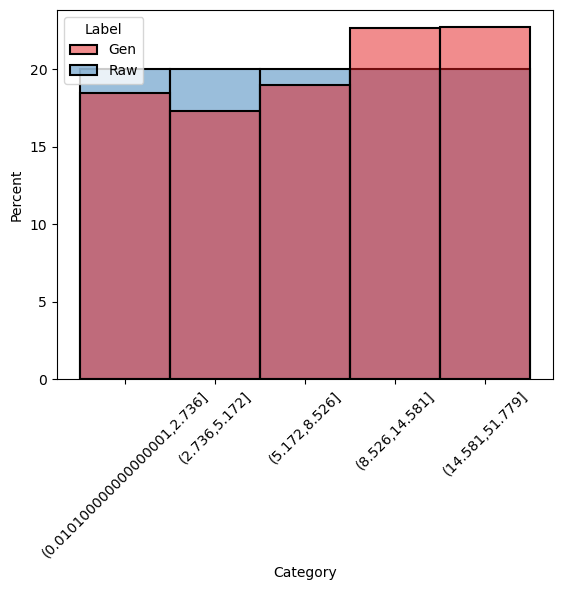

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 2s is 0.47958074792867056
[ 0.9         3.75159478  6.40708996  9.91216993 23.10470069 58.1635    ]
0.2219413922999979


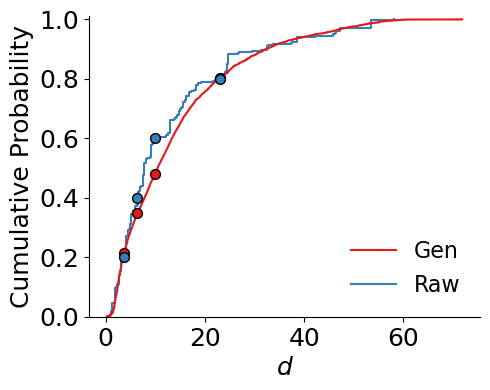

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


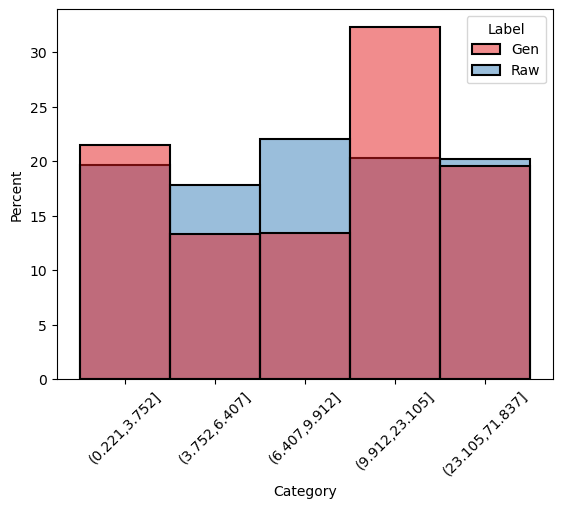

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\149695928.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


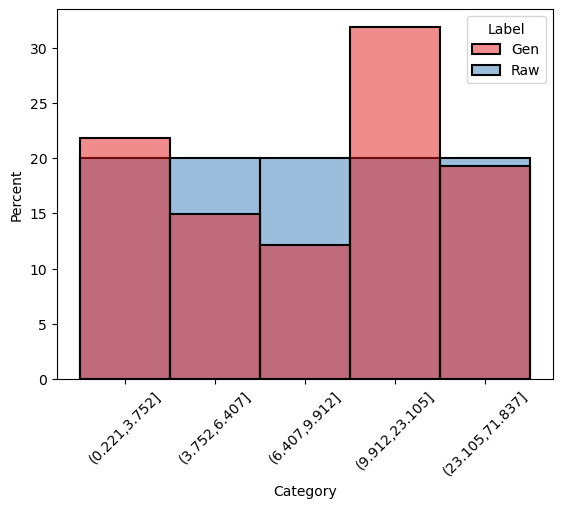

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


p_value on t = 3s is 0.2903170281801227
[ 0.9         3.38791758  6.81302652 12.21437123 24.32916054 77.2335    ]
0.5371723292499713


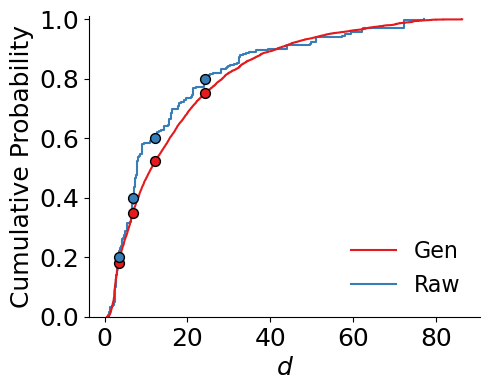

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


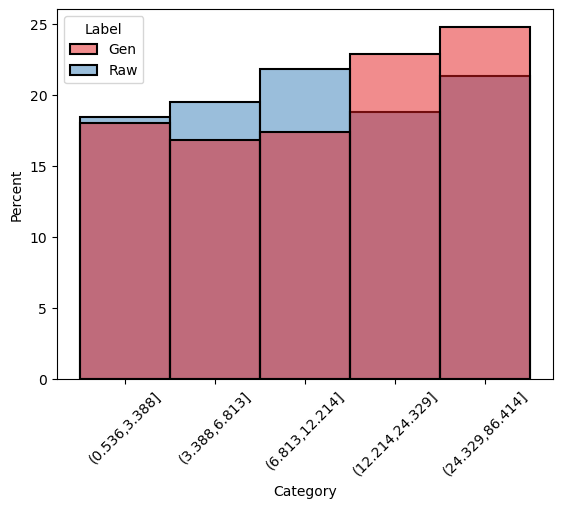

C:\Users\minxiang\AppData\Local\Temp\ipykernel_24900\149695928.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


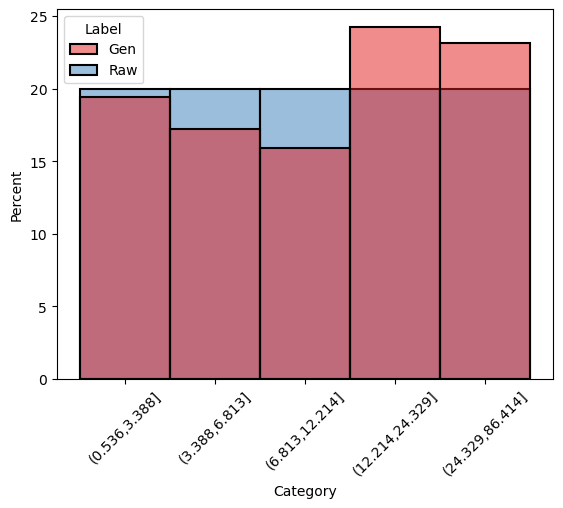

p_value on t = 4s is 0.13984920418335245


In [224]:
import copy
para = "d"
ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

## read the data
if para in ["v_l","v_f","d"]:
    Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type,nofilter=False)
# elif para == "v_l_dt"
Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type=split_type,nofilter=False)
if para == "d":
    Weight_gen_eva = Weight_gen_eva[~np.any(Para_gen_eva[:,:-1]<=0,axis=1)]
    Para_gen_eva = Para_gen_eva[~np.any(Para_gen_eva[:,:-1]<=0,axis=1),:]

if para == "v_l":
    # Para_raw_eva = V_l_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_l_raw)
elif para == "v_f":
    # Para_raw_eva = V_f_raw[ID_eva-1]
    Para_raw_eva = np.copy(V_f_raw)
elif para == "d":
    # Para_raw_eva = D_raw[ID_eva-1]
    Para_raw_eva = np.copy(D_raw)
# Weight_raw_eva = Weight_raw[ID_eva-1]
Weight_raw_eva = np.copy(Weight_raw)

## plotting
for t in range(5):
    df_plot = create_df_for_cdf(
        [Para_gen_eva[:,-1-20*t-1],Para_raw_eva[:,-1-20*t-1]],
        ["Gen","Raw"],
        [Weight_gen_eva,Weight_raw_eva],
    )
    # Separate the zero and non-zero data
    n_bins = 5
    df_plot_raw_nonzero = df_plot[np.all([df_plot['Label'] == "Raw",df_plot['Data'] > 0],axis=0)]  # Data greater than zero
    bins = weighted_percentile(df_plot_raw_nonzero['Data'], df_plot_raw_nonzero['Weight'], np.linspace(0, 1, n_bins+1))
    print(bins)
    # bins = np.concatenate(( [0,1e-5], bins[1:-1], [np.max(df_plot['Data'])] ))
    if np.max(df_plot['Data'])!= bins[-1]:
        bins = np.concatenate(( bins[:-1], [np.max(df_plot['Data'])] ))
    if np.min(df_plot['Data'])==0:
        bins = np.concatenate(( [0,1e-5], bins[1:] ))
    elif np.min(df_plot['Data'])!= bins[0]:
        bins = np.concatenate(( [np.min(df_plot['Data'])], bins[1:] ))
    print(np.min(df_plot['Data']))
    df_plot['Category'] = pd.cut(df_plot['Data'], bins=bins, include_lowest=True)
    df_plot['Category'] = df_plot['Category'].apply(format_interval)

    plt.figure(figsize=(5,4))
    sns_comparison(
        data = df_plot,
        x = "Data",
        weights = "Weight",
        hue = "Label",
        type='ecdf',
        x_percentile_points = bins[1:-1],
        # legend_off = True,
        xlabel=f"${para}$",
        ylabel="Cumulative Probability",
        xaxis_off=True,
        yaxis_off=True,
        # xticks_off=True,
        # yticks_off=True,
        ylim=[0,1.01],
    )
    plt.show()
    
    sns.histplot(
        data=df_plot,
        x="Category",
        weights = "Weight",
        stat='percent',
        hue = "Label",
        # element='poly',
        common_bins=True,
        common_norm=False,
        palette='Set1',
        linewidth=1.5
    )
    plt.xticks(rotation=45)
    plt.show()

    # Calculate the current weights for 'Raw'
    raw_weights = df_plot[df_plot['Label'] == 'Raw'].groupby('Category')['Weight'].sum()    
    # Calculate coefficients for each category
    coefficients = np.sum(raw_weights)/n_bins/raw_weights
    # Apply the coefficients to both 'Raw' and 'Gen' weights
    df_plot['Adjusted_Weight'] = df_plot.apply(
        # lambda row: row['Weight'] * coefficients[row['Category']] if row['Label'] == 'Raw' else row['Weight'] * coefficients[row['Category']],
        lambda row: row['Weight'] * coefficients[row['Category']],
        axis=1
    )    
    # Now, 'Adjusted_Weight' contains the new weights
    sns.histplot(
        data=df_plot,
        x="Category",
        weights="Adjusted_Weight",
        stat='percent',
        hue="Label",
        common_bins=True,
        common_norm=False,
        palette='Set1',
        linewidth=1.5
    )
    plt.xticks(rotation=45)
    plt.show()

    _, p_value = weighted_ks_2samp(
        Para_gen_eva[:,-1-20*t],Para_raw_eva[:,-1-20*t],
        Weight_gen_eva,Weight_raw_eva
    )
    print(f"p_value on t = {t}s is {p_value}")

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


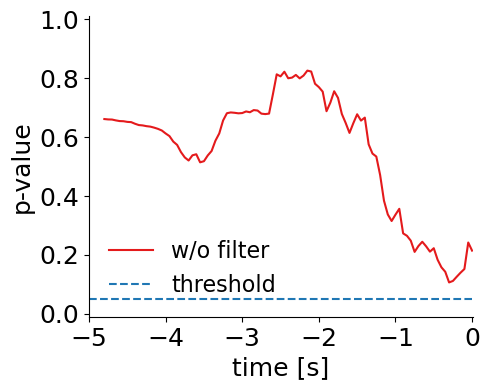

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


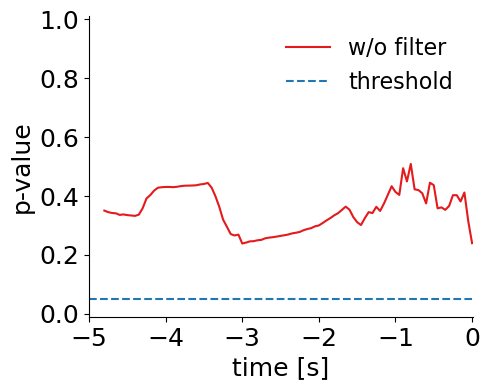

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


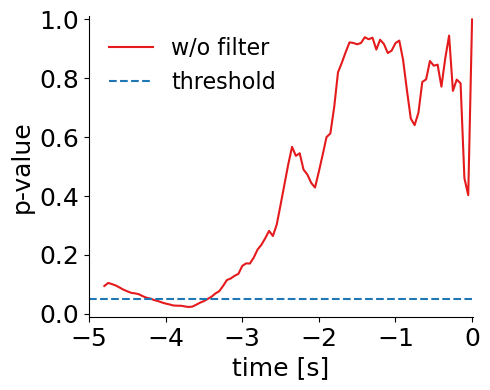

In [57]:
import copy
# ID_eva = copy.deepcopy(ID_test)
ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

for para in ["v_l","v_f","d"]:
    
    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type=split_type)
    
    if para == "v_l":
        # Para_raw_eva = V_l_raw[ID_eva-1]
        Para_raw_eva = V_l_raw
    elif para == "v_f":
        # Para_raw_eva = V_f_raw[ID_eva-1]
        Para_raw_eva = V_f_raw
    elif para == "d":
        # Para_raw_eva = D_raw[ID_eva-1]
        Para_raw_eva = D_raw
    # Weight_raw_eva = Weight_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


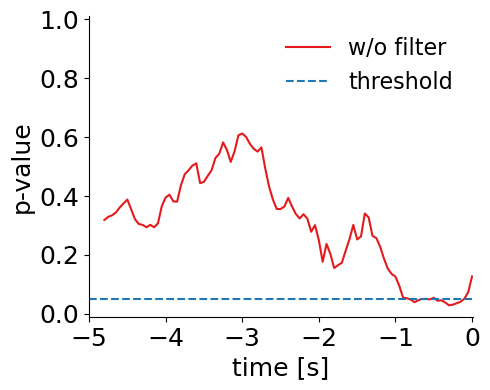

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


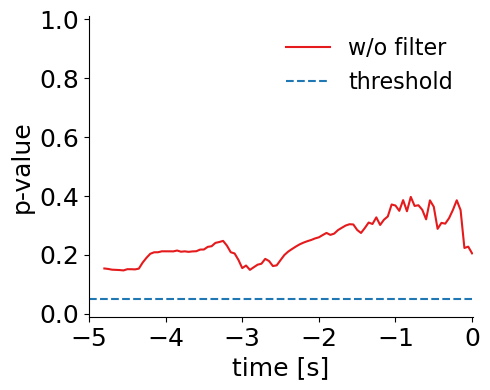

C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\minxiang\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


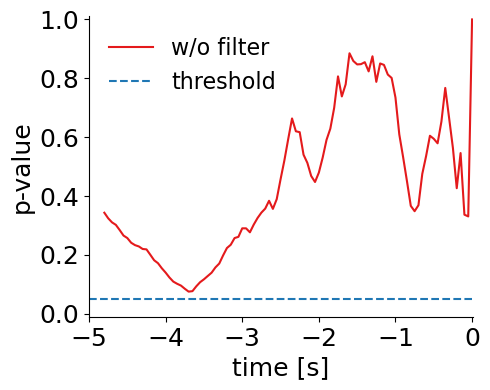

In [58]:
import copy
ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

for para in ["v_l","v_f","d"]:
    
    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type,nofilter=False)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type=split_type,nofilter=False)
    
    if para == "v_l":
        # Para_raw_eva = V_l_raw[ID_eva-1]
        Para_raw_eva = V_l_raw
    elif para == "v_f":
        # Para_raw_eva = V_f_raw[ID_eva-1]
        Para_raw_eva = V_f_raw
    elif para == "d":
        # Para_raw_eva = D_raw[ID_eva-1]
        Para_raw_eva = D_raw
    # Weight_raw_eva = Weight_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)

    ## Plotting
    df_plot = create_df_for_lineplot(
        [P_value],
        ['w/o filter']
    )
    
    plt.figure(figsize=(5,4))
    sns_ks(data = df_plot,
           # legend_off = True,
           xlabel="time [s]",
           ylabel="p-value",
           xlim=[-5,0.01],
           ylim=[-0.01,1.01],
           # labels = {'w/o filter':'w/o filter'},
           xaxis_off=True,
           yaxis_off=True,
           # xticks_off=True,
           # yticks_off=True,
    )
    plt.show()

In [23]:
import copy
ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

List_P = []
for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='reweight',split_type=split_type)
    
    if para == "v_l":
        # Para_raw_eva = V_l_raw[ID_eva-1]
        Para_raw_eva = V_l_raw
    elif para == "v_f":
        # Para_raw_eva = V_f_raw[ID_eva-1]
        Para_raw_eva = V_f_raw
    elif para == "d":
        # Para_raw_eva = D_raw[ID_eva-1]
        Para_raw_eva = D_raw
    # Weight_raw_eva = Weight_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)
    List_P.append(P_value)

In [24]:
time_series_list = [list_P>0.05 for list_P in List_P]

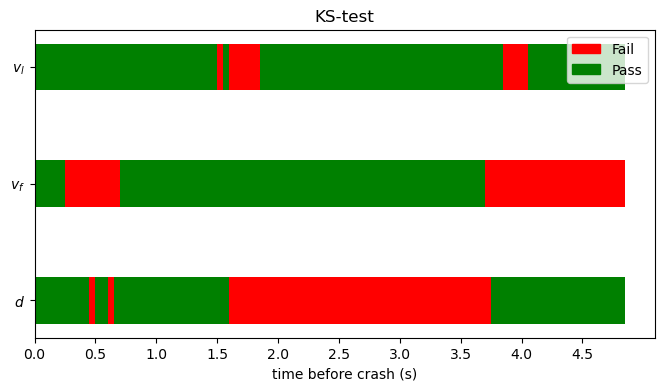

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# # Example time series data containing only 0 and 1
# time_series_1 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
# time_series_2 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
# time_series_3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
# time_series_4 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# # Combine the time series into a list
# time_series_list = [time_series_1, time_series_2, time_series_3, time_series_4]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each time series
for idx, time_series in enumerate(reversed(time_series_list)):
    colors = ['red' if value == 0 else 'green' for value in time_series]
    for i, value in enumerate(time_series):
        ax.barh(idx, 1, left=i, height=0.4, color=colors[i])

# Set the y-ticks and labels to represent the time series
ax.set_yticks(np.arange(len(time_series_list)))
# ax.set_yticklabels([f'Series {i+1}' for i in range(len(time_series_list))])
ax.set_yticklabels(reversed(["$v_l$","$v_f$","$d$"]))

# Label the x-axis
ax.set_xlabel('time before crash (s)')

# # Set the x-ticks to show the time points
# ax.set_xticks(np.arange(0,len(time_series_list[0])*0.05,0.05) + 0.5)
# ax.set_xticklabels(np.arange(0,len(time_series_list[0])*0.05,0.05))
x_ticks = np.arange(0, len(time_series_list[0]) * 0.05, 0.5)
ax.set_xticks(x_ticks / 0.05)
ax.set_xticklabels([f'{tick:.1f}' for tick in x_ticks])

# Add a title to the plot
plt.title('KS-test')

# Create legend
red_patch = mpatches.Patch(color='red', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
# plt.legend(handles=[red_patch, green_patch], title='Values')
plt.legend(handles=[red_patch, green_patch])

# Display the plot
plt.show()


In [26]:
import copy
ID_eva = copy.deepcopy(ID_eva_raw)
split_type = 'test'

List_P = []
for para in ["v_l","v_f","d"]:

    ## read the data
    if para in ["v_l","v_f","d"]:
        Para_gen_eva = extract_data_from_dfgen(df_gen,para=para,split_type=split_type)
    # elif para == "v_l_dt"
    Weight_gen_eva = extract_data_from_dfgen(df_gen,para='weight',split_type=split_type)
    
    if para == "v_l":
        # Para_raw_eva = V_l_raw[ID_eva-1]
        Para_raw_eva = V_l_raw
    elif para == "v_f":
        # Para_raw_eva = V_f_raw[ID_eva-1]
        Para_raw_eva = V_f_raw
    elif para == "d":
        # Para_raw_eva = D_raw[ID_eva-1]
        Para_raw_eva = D_raw
    # Weight_raw_eva = Weight_raw[ID_eva-1]
    Weight_raw_eva = Weight_raw

    ## Calculate the p-value
    P_value = []
    for t in range(-1,-98,-1):
        
        _, p_value = weighted_ks_2samp(
            Para_gen_eva[:,t],Para_raw_eva[:,t],
            Weight_gen_eva,Weight_raw_eva
        )
        P_value.append(p_value)
    P_value = np.array(P_value)
    List_P.append(P_value)

In [27]:
time_series_list = [list_P>0.05 for list_P in List_P]

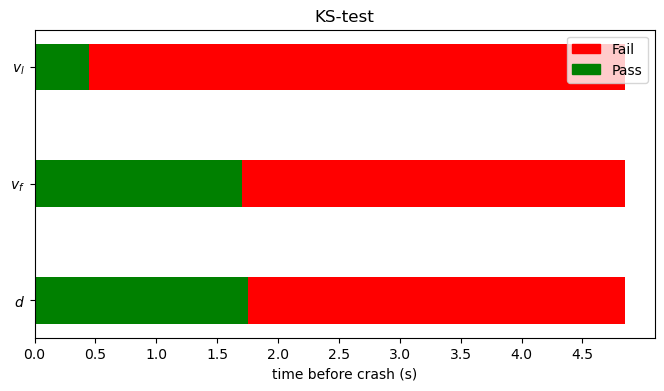

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# # Example time series data containing only 0 and 1
# time_series_1 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
# time_series_2 = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
# time_series_3 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
# time_series_4 = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# # Combine the time series into a list
# time_series_list = [time_series_1, time_series_2, time_series_3, time_series_4]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot each time series
for idx, time_series in enumerate(reversed(time_series_list)):
    colors = ['red' if value == 0 else 'green' for value in time_series]
    for i, value in enumerate(time_series):
        ax.barh(idx, 1, left=i, height=0.4, color=colors[i])

# Set the y-ticks and labels to represent the time series
ax.set_yticks(np.arange(len(time_series_list)))
# ax.set_yticklabels([f'Series {i+1}' for i in range(len(time_series_list))])
ax.set_yticklabels(reversed(["$v_l$","$v_f$","$d$"]))

# Label the x-axis
ax.set_xlabel('time before crash (s)')

# # Set the x-ticks to show the time points
# ax.set_xticks(np.arange(0,len(time_series_list[0])*0.05,0.05) + 0.5)
# ax.set_xticklabels(np.arange(0,len(time_series_list[0])*0.05,0.05))
x_ticks = np.arange(0, len(time_series_list[0]) * 0.05, 0.5)
ax.set_xticks(x_ticks / 0.05)
ax.set_xticklabels([f'{tick:.1f}' for tick in x_ticks])

# Add a title to the plot
plt.title('KS-test')

# Create legend
red_patch = mpatches.Patch(color='red', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
# plt.legend(handles=[red_patch, green_patch], title='Values')
plt.legend(handles=[red_patch, green_patch])

# Display the plot
plt.show()
